In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
population=1000000
#creating random parents to cross breed
vector_1=[random.choice(np.arange(1,1000,0.1)) for i in range(population)]
vector_2=[random.choice(np.arange(1,1000,0.1)) for i in range(population)]
#since as we know till now all the cossover operations were just swapping but if our vector would be in the form of floating points then we surely needs something fuzzie 

In [8]:
print("old values of vector 1 \n {}..... \n \n old value of vector 2 \n {}.....".format(vector_1[0:20],vector_2[0:20]))

old values of vector 1 
 [417.9000000000004, 563.9000000000005, 226.3000000000002, 231.0000000000002, 22.60000000000002, 521.1000000000005, 47.90000000000004, 788.1000000000007, 877.5000000000008, 709.2000000000006, 448.9000000000004, 655.1000000000006, 493.40000000000043, 530.2000000000005, 620.8000000000005, 347.6000000000003, 772.2000000000007, 73.80000000000007, 136.5000000000001, 154.70000000000013]..... 
 
 old value of vector 2 
 [635.4000000000005, 836.8000000000008, 216.1000000000002, 720.3000000000006, 255.80000000000024, 764.2000000000007, 986.4000000000009, 618.7000000000005, 211.2000000000002, 316.8000000000003, 6.800000000000005, 66.60000000000005, 395.80000000000035, 945.1000000000008, 380.20000000000033, 367.30000000000035, 197.2000000000002, 993.8000000000009, 2.8000000000000016, 199.60000000000016].....


In [13]:
def line_recombination(vector_1,vector_2):
    p=0.25
    alpha=random.uniform(-p,1+p)
    beta=random.uniform(-p,1+p)
    for i in range(population):
        t=alpha*vector_1[i]+(1-alpha)*vector_2[i]
        s=beta*vector_2[i]+(1-beta)*vector_1[i]
        if (t-s)<=0.25 or (t-s)>=-0.25:
            vector_1[i]=t
            vector_2[i]=s
    return vector_1,vector_2

In [16]:
nvector_1,nvector_2=line_recombination(vector_1,vector_2)

In [17]:
print("New values of vector 1 \n {} \n \n New value of vector 2 \n {}".format(nvector_1[0:20],nvector_2[0:20]))

New values of vector 1 
 [598.3141132818554, 790.2678690327281, 217.83920020471325, 636.8695431209734, 216.037109045189, 722.749061787674, 826.3765301840047, 647.5843641841559, 324.81069572551786, 383.7080549342539, 82.1823931866297, 166.94503141898122, 412.44175882156804, 874.3554740259393, 421.22466365234845, 363.9409564673684, 295.2431487950965, 836.9309619278469, 25.59716346765978, 191.9441089027831] 
 
 New value of vector 2 
 [595.0014567374977, 786.1114369823594, 217.99455237369, 629.4172081915287, 212.48533200544546, 719.0465017603942, 812.0826075776612, 650.1644286375546, 334.9588477048537, 389.68454425841924, 88.91584356943682, 175.90824234474914, 413.9282658502086, 868.0362960937368, 424.88914716762423, 363.640913552776, 304.00074655604226, 822.9188055103338, 27.63349532963968, 191.26025474718926]


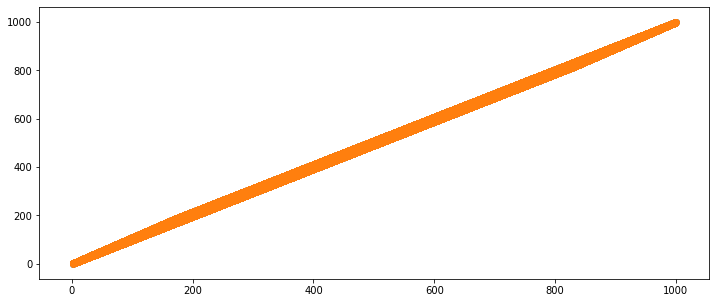

In [22]:
plt.figure(figsize=(12,5))
plt.scatter(vector_1,vector_2)
plt.scatter(nvector_1,nvector_2)
#they are overlapping

## chirag this is for you as i was taking population around 1000 but tab line jasia nahi dikh rha tha or 10000 krte hi line draw ho gayiii

In [127]:
def intermediate_recombinations(vector_1,vector_2):
    p=0.25
    for i in range(population):
        alpha=random.uniform(-p,1+p)
        beta=random.uniform(-p,1+p)
        t=alpha*vector_1[i]+(1-alpha)*vector_2[i]
        s=beta*vector_2[i]+(1-beta)*vector_1[i]
        if (t-s)<=0.25 or (t-s)>=-0.25:
            vector_1[i]=t
            vector_2[i]=s
    return vector_1,vector_2
    

In [128]:
n1vector_1,n2vector_2=intermediate_recombinations(vector_1,vector_2)

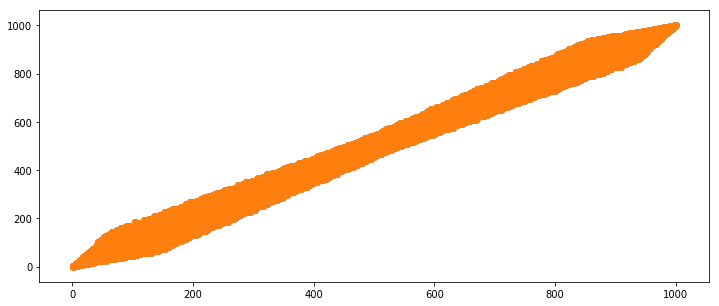

In [129]:
plt.figure(figsize=(12,5))
plt.scatter(vector_1,vector_2)
plt.scatter(n1vector_1,n2vector_2)

## Going to implement FitnessProportionate Selection / Roulette Selection

In [336]:
genes="abcdefghijklmnoprst"
target="akshey"
pop_size=100

In [337]:
def create_pop(pop_size):
    global target
    l=len(target)
    pop=[]
    for j in range(pop_size):
        s=[]
        for i in range(l):
            s.append(random.choice(genes))
        pop.append(s)
    return pop

In [338]:
population=create_pop(pop_size)

In [339]:
def fitness(population):
    fitscore=[]
    for i in population:
        fit=0
        for j in range(len(i)):
            if i[j]==target[j]:
                fit+=1
        fitscore.append(fit)
            
    return fitscore

In [340]:
pop_fit=fitness(population)
sum=np.sum(pop_fit)
arr=np.sort(pop_fit)[::-1]

In [307]:
def Roulette_Selection(number_wanted_to_select):
    global population
    global arr
    selectedPopulation=[]
    for i in range(number_wanted_to_select):
        partial_sum=random.randint(0,sum)
        for i in range(len(arr)):
            if sum>partial_sum:
                partial_sum+=arr[i]
            else:
                selectedPopulation.append(population[i])
                break
                print(population[i])
    return selectedPopulation


In [308]:
Roulette_Selection(10)

[['m', 'g', 'p', 'g', 's', 's'],
 ['m', 'l', 'i', 'c', 'i', 'c'],
 ['k', 'n', 'f', 'i', 'i', 'a'],
 ['r', 'r', 'f', 'h', 'b', 'c'],
 ['i', 'r', 'e', 'j', 'd', 'd'],
 ['m', 'l', 'i', 'c', 'i', 'c'],
 ['m', 'g', 'p', 'g', 's', 's'],
 ['m', 'l', 'i', 'c', 'i', 'c'],
 ['n', 'r', 'l', 'd', 'd', 'p'],
 ['s', 'j', 's', 'i', 'n', 'm']]

In [379]:
pop_fit=fitness(population)
sum=np.sum(pop_fit)
arr=np.sort(pop_fit)[::-1]
def SUS(number_wanted_to_select):
        global population
        global arr
        global sum
        global pop_fit
        fitness=pop_fit
        selectedPopulation=[]
        x=sum/number_wanted_to_select
        init=random.uniform(0,x)
        for i in range(0,len(pop_fit)):
            fitness[i]+=fitness[i-1]
        j=0
        for i in range(0,10):
            while (fitness[j]<init):
                if j<=100:
                    j+=1
                    
                break
            init+=x
            selectedPopulation.append(population[j])
        return selectedPopulation
        

In [380]:
SUS(10)

[['c', 'f', 'n', 'm', 'o', 'f'],
 ['n', 's', 'o', 't', 'm', 'b'],
 ['l', 'c', 'j', 'e', 'a', 'o'],
 ['d', 'e', 'a', 'l', 'h', 'e'],
 ['p', 'm', 'l', 'c', 'p', 'h'],
 ['m', 'k', 'a', 'c', 'f', 'e'],
 ['p', 'g', 'c', 'g', 'e', 'e'],
 ['d', 'e', 'a', 't', 'j', 'p'],
 ['m', 'r', 't', 'p', 'r', 'i'],
 ['o', 'l', 'b', 's', 'e', 'a']]

In [381]:
pop_fit=fitness(population)
def Tournament(keep):
    global pop_fit
    global population
    tournament_size=10
    selected=[]
    for i in range(keep):
        best=random.choice(population)
        for i in range(2,tournament_size):
            next=random.choice(population)
            if pop_fit[population.index(best)]<pop_fit[population.index(next)]:
                best=next
        selected.append(best)
    return selected
    

In [382]:
Tournament(10)

[['p', 'k', 'h', 'a', 'o', 'd'],
 ['r', 'k', 'p', 'b', 'd', 'n'],
 ['g', 'd', 's', 'a', 'c', 'm'],
 ['r', 'k', 'p', 'b', 'd', 'n'],
 ['s', 'k', 'i', 'k', 'g', 'b'],
 ['n', 'l', 'l', 'h', 'r', 'n'],
 ['g', 'k', 'k', 't', 'k', 'o'],
 ['o', 'l', 'b', 's', 'e', 'a'],
 ['j', 'k', 'a', 'e', 'l', 'k'],
 ['j', 'k', 'a', 'e', 'l', 'k']]